In [77]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
import gsw

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight Coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/500yr/23030101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/500yr/23030101.ocean_annual_rho2.nc'
drho_straight = xr.open_dataset(path_rho2_straight, decode_times=True)

# path to ocean_annual_z file
path_z_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/500yr/23030101.ocean_annual_z.nc'
dz_straight = xr.open_dataset(path_z_straight, decode_times=True)



# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/500yr/23000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/500yr/23000101.ocean_annual_rho2.nc'
drho_both = xr.open_dataset(path_rho2_both, decode_times=True)

# path to ocean_annual_z file
path_z_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/500yr/23000101.ocean_annual_z.nc'
dz_both = xr.open_dataset(path_z_both, decode_times=True)



# Case name (Wide Straight)
case_wide = 'Wide Straight'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/500yr/23000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/500yr/23000101.ocean_annual_rho2.nc'
drho_wide = xr.open_dataset(path_rho2_wide, decode_times=True)

# path to ocean_annual_z file
path_z_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/500yr/23000101.ocean_annual_z.nc'
dz_wide = xr.open_dataset(path_z_wide, decode_times=True)



# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/500yr/23000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/500yr/23000101.ocean_annual_rho2.nc'
drho_am = xr.open_dataset(path_rho2_am, decode_times=True)

# path to ocean_annual_z file
path_z_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/500yr/23000101.ocean_annual_z.nc'
dz_am = xr.open_dataset(path_z_am, decode_times=True)


# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_annual_rho2 file
path_rho2_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual_rho2.nc'
drho_af = xr.open_dataset(path_rho2_af, decode_times=True)

# path to ocean_annual_z file
path_z_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/500yr/23000101.ocean_annual_z.nc'
dz_af = xr.open_dataset(path_z_af, decode_times=True)



#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_both['xh']==211)[0][0]
x_east = np.where(dy_both['xh']==351)[0][0]
y = np.where(dy_both['yq']==-35)[0][0]
y_south = np.where(dy_both['yq']==-71)[0][0]
y_north = np.where(dy_both['yq']==71)[0][0]



/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [78]:
def calculate_basin_sfn(vmo, vhGM, x_west, x_east, y_south, y_north):
    vmo_slice = vmo.isel(time=slice(-31,-1)).mean(dim='time')
    vhGM_slice = vhGM.isel(time=slice(-31,-1)).mean(dim='time')
    sfn_basin_resmean = (np.cumsum(np.nansum((vmo_slice[:,y_south:y_north,x_west:x_east])/1035, axis=2), axis=0))/(1e6)
    sfn_basin_res = (np.cumsum(np.nansum((vhGM_slice[:,y_south:y_north,x_west:x_east])/1035, axis=2), axis=0))/(1e6)
    sfn_basin_mean = sfn_basin_resmean - sfn_basin_res
    return sfn_basin_resmean


def max_overturning_depth(sfn_basin_resmean, dataset):
    max_value = sfn_basin_resmean[:,0:49].max()
    max_index = np.where(sfn_basin_resmean[:,0:49] == max_value)
    
#     max_value = sfn_basin_resmean.max()
#     max_index = np.where(sfn_basin_resmean == max_value)

    h = dataset.h.isel(xh=slice(x_west,x_east)).isel(yh=slice(y,y_north)).mean(dim='time').mean(dim='xh')

    depth = h.cumsum(dim='rho2_l')

    max_depth = depth[max_index[0][0],max_index[1][0]]
    return(max_depth, max_value)


def calc_sigma2(dy_case, salt, temp):
    CT = xr.apply_ufunc(gsw.CT_from_pt, salt, temp, dask='parallelized', output_dtypes=[float,])

    sigma2 = xr.apply_ufunc(gsw.sigma2, salt, CT, dask='parallelized', output_dtypes=[float,])
    
    sigma2_xarray = temp.copy()
    sigma2_xarray.attrs['units'] = 'kg/m^3' 
    sigma2_xarray.attrs['long_name'] = 'potential density referenced to 2000 dbar'
    sigma2_xarray.attrs['standard_name'] = 'sigma2'
    sigma2_xarray.values = sigma2
    
    return sigma2_xarray
    
    
def delta_rho(z_dataset, annual_dataset):
    
#     # uncomment this block of code for delta rho between northern boundary and equator
#     if annual_dataset.so.sel(xh=slice(240,243)).sel(yh=slice(-2,1)).sum() != np.nan:
#         rho_north = calc_sigma2(z_dataset, 
#                                    annual_dataset.so.sel(xh=slice(252,255)).sel(yh=slice(66,69)).isel(time=slice(-31,-1)).mean(dim='time'), 
#                                    annual_dataset.thetao.sel(xh=slice(252,255)).sel(yh=slice(66,69)).isel(time=slice(-31,-1)).mean(dim='time'))
#         rho_south = calc_sigma2(z_dataset, 
#                                    annual_dataset.so.sel(xh=slice(240,243)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'), 
#                                    annual_dataset.thetao.sel(xh=slice(240,243)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'))

#     else:
#         rho_north = calc_sigma2(z_dataset, 
#                                    annual_dataset.so.sel(xh=slice(252,255)).sel(yh=slice(66,69)).isel(time=slice(-31,-1)).mean(dim='time'), 
#                                    annual_dataset.thetao.sel(xh=slice(252,255)).sel(yh=slice(66,69)).isel(time=slice(-31,-1)).mean(dim='time'))
#         rho_south = calc_sigma2(z_dataset, 
#                                    annual_dataset.so.sel(xh=slice(252,255)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'), 
#                                    annual_dataset.thetao.sel(xh=slice(252,255)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'))
    
    # uncomment this block of code for delta rho between northern boundary and southern extent of Africa
    if annual_dataset.so.sel(xh=slice(240,243)).sel(yh=slice(-2,1)).sum() != np.nan:
        rho_north = calc_sigma2(z_dataset, 
                                   annual_dataset.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   annual_dataset.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))
        rho_south = calc_sigma2(z_dataset, 
                                   annual_dataset.so.sel(xh=slice(240,243)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   annual_dataset.thetao.sel(xh=slice(240,243)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

    else:
        rho_north = calc_sigma2(z_dataset, 
                                   annual_dataset.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   annual_dataset.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))
        rho_south = calc_sigma2(z_dataset, 
                                   annual_dataset.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   annual_dataset.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))
    delta_rho_tmp = rho_north.copy()
    delta_rho_tmp.values = rho_north.values-rho_south.values
    delta_rho = delta_rho_tmp.mean(dim='yh').mean(dim='xh')
    delta_rho
    return(delta_rho)


## Find depth of maximum overturning for each case:

In [79]:
sfn_small_resmean_straight = calculate_basin_sfn(drho_straight.vmo, drho_straight.vhGM, x_west, x_east, y, y_north)

max_depth_straight, max_ov_straight = max_overturning_depth(sfn_small_resmean_straight, drho_straight)


In [80]:
sfn_small_resmean_both = calculate_basin_sfn(drho_both.vmo, drho_both.vhGM, x_west, x_east, y, y_north)

max_depth_both, max_ov_both = max_overturning_depth(sfn_small_resmean_both, drho_both)


In [81]:
sfn_small_resmean_am = calculate_basin_sfn(drho_am.vmo, drho_am.vhGM, x_west, x_east, y, y_north)

max_depth_am, max_ov_am = max_overturning_depth(sfn_small_resmean_am, drho_am)


In [82]:
sfn_small_resmean_af = calculate_basin_sfn(drho_af.vmo, drho_af.vhGM, x_west, x_east, y, y_north)

max_depth_af, max_ov_af = max_overturning_depth(sfn_small_resmean_af, drho_af)


In [83]:
sfn_small_resmean_wide = calculate_basin_sfn(drho_wide.vmo, drho_wide.vhGM, x_west, x_east, y, y_north)

max_depth_wide, max_ov_wide = max_overturning_depth(sfn_small_resmean_wide, drho_wide)


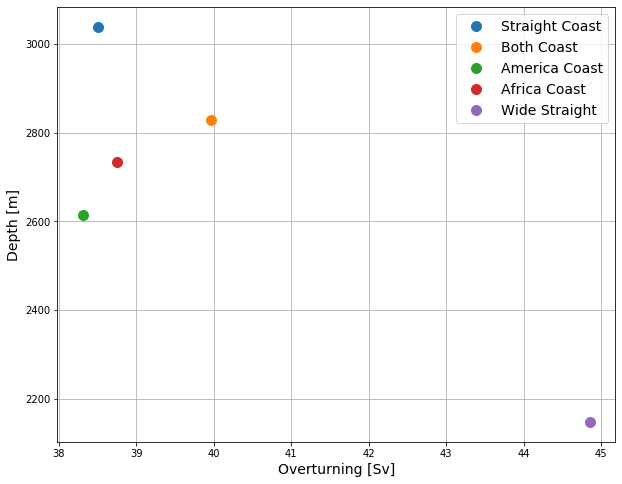

In [111]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, max_depth_straight, 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, max_depth_both, 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, max_depth_am, 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, max_depth_af, 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, max_depth_wide, 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel('Depth [m]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.show()

## Now trying the Western Boundary density gradient double integration method

from deBoer et al 2010 \
overturning is proportional to meridional density gradient and depth where the meridional pressure gradient in the western boundary = 0

In [85]:
rho_north_straight = calc_sigma2(dz_straight, 
                                   dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_straight = calc_sigma2(dz_straight, 
                                   dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_straight_tmp = rho_north_straight.copy()
delta_rho_straight_tmp.values = rho_north_straight.values-rho_south_straight.values
delta_rho_straight = delta_rho_straight_tmp.mean(dim='yh').mean(dim='xh')


In [86]:
rho_north_both = calc_sigma2(dz_both, 
                                   dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_both = calc_sigma2(dz_both, 
                                   dy_both.so.sel(xh=slice(240,243)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_both.thetao.sel(xh=slice(240,243)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_both_tmp = rho_north_both.copy()
delta_rho_both_tmp.values = rho_north_both.values-rho_south_both.values
delta_rho_both = delta_rho_both_tmp.mean(dim='yh').mean(dim='xh')


In [87]:
rho_north_wide = calc_sigma2(dz_wide, 
                                   dy_wide.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_wide.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_wide = calc_sigma2(dz_wide, 
                                   dy_wide.so.sel(xh=slice(252,255)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_wide.thetao.sel(xh=slice(252,255)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_wide_tmp = rho_north_wide.copy()
delta_rho_wide_tmp.values = rho_north_wide.values-rho_south_wide.values
delta_rho_wide = delta_rho_wide_tmp.mean(dim='yh').mean(dim='xh')


In [88]:
rho_north_am = calc_sigma2(dz_am, 
                                   dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_am = calc_sigma2(dz_am, 
                                   dy_am.so.sel(xh=slice(240,243)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_am.thetao.sel(xh=slice(240,243)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_am_tmp = rho_north_am.copy()
delta_rho_am_tmp.values = rho_north_am.values-rho_south_am.values
delta_rho_am = delta_rho_am_tmp.mean(dim='yh').mean(dim='xh')


In [89]:
rho_north_af = calc_sigma2(dz_af, 
                                   dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_af = calc_sigma2(dz_af, 
                                   dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                   dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-2,1)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_af_tmp = rho_north_af.copy()
delta_rho_af_tmp.values = rho_north_af.values-rho_south_af.values
delta_rho_af = delta_rho_af_tmp.mean(dim='yh').mean(dim='xh')


### Plotting against density gradient (northern boundary - equator), mean from surface to 1400m a la deBoer et al 2010

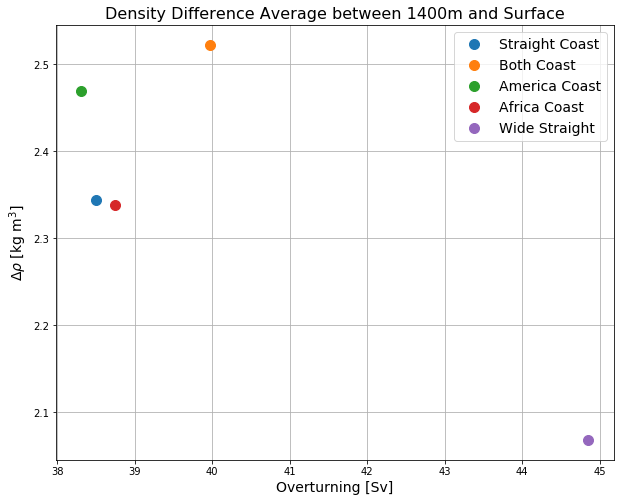

In [90]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, delta_rho_straight.sel(zl=slice(0,1400)).mean(), 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, delta_rho_both.sel(zl=slice(0,1400)).mean(), 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, delta_rho_am.sel(zl=slice(0,1400)).mean(), 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, delta_rho_af.sel(zl=slice(0,1400)).mean(), 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, delta_rho_wide.sel(zl=slice(0,1400)).mean(), 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\Delta \rho$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Density Difference Average between 1400m and Surface', fontsize=16)
plt.show()

### Plotting against density gradient (northern boundary - equator) at various depths:

In [91]:
# delta_rho_straight = delta_rho(dz_straight, dy_straight)
# delta_rho_both = delta_rho(dz_both, dy_both)
# delta_rho_wide = delta_rho(dz_wide, dy_wide)
# delta_rho_am = delta_rho(dz_am, dy_am)
# delta_rho_af = delta_rho(dz_af, dy_af)


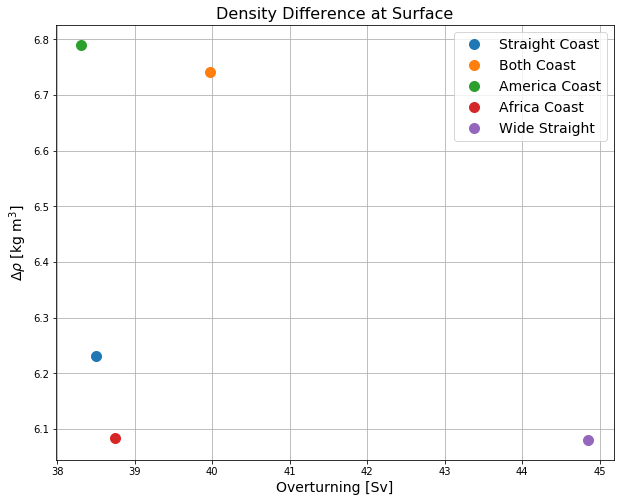

In [98]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, delta_rho_straight.sel(zl=0, method='nearest'), 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, delta_rho_both.sel(zl=0, method='nearest'), 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, delta_rho_am.sel(zl=0, method='nearest'), 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, delta_rho_af.sel(zl=0, method='nearest'), 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, delta_rho_wide.sel(zl=0, method='nearest'), 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\Delta \rho$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Density Difference at Surface', fontsize=16)
plt.show()

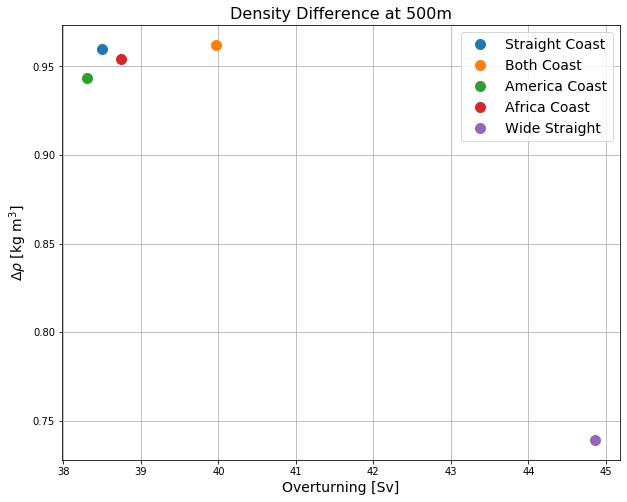

In [93]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, delta_rho_straight.sel(zl=500, method='nearest'), 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, delta_rho_both.sel(zl=500, method='nearest'), 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, delta_rho_am.sel(zl=500, method='nearest'), 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, delta_rho_af.sel(zl=500, method='nearest'), 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, delta_rho_wide.sel(zl=500, method='nearest'), 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\Delta \rho$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Density Difference at 500m', fontsize=16)
plt.show()

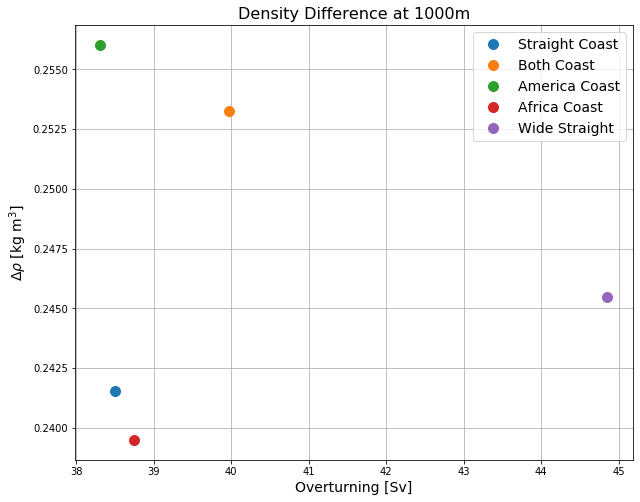

In [94]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, delta_rho_straight.sel(zl=1000, method='nearest'), 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, delta_rho_both.sel(zl=1000, method='nearest'), 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, delta_rho_am.sel(zl=1000, method='nearest'), 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, delta_rho_af.sel(zl=1000, method='nearest'), 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, delta_rho_wide.sel(zl=1000, method='nearest'), 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\Delta \rho$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Density Difference at 1000m', fontsize=16)
plt.show()

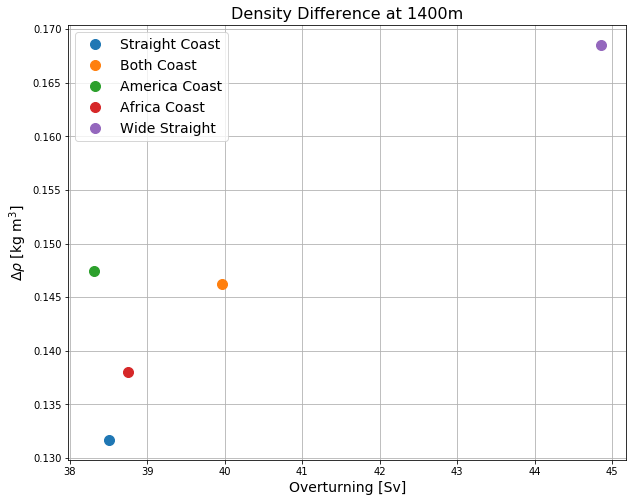

In [95]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, delta_rho_straight.sel(zl=1400, method='nearest'), 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, delta_rho_both.sel(zl=1400, method='nearest'), 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, delta_rho_am.sel(zl=1400, method='nearest'), 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, delta_rho_af.sel(zl=1400, method='nearest'), 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, delta_rho_wide.sel(zl=1400, method='nearest'), 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\Delta \rho$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Density Difference at 1400m', fontsize=16)
plt.show()



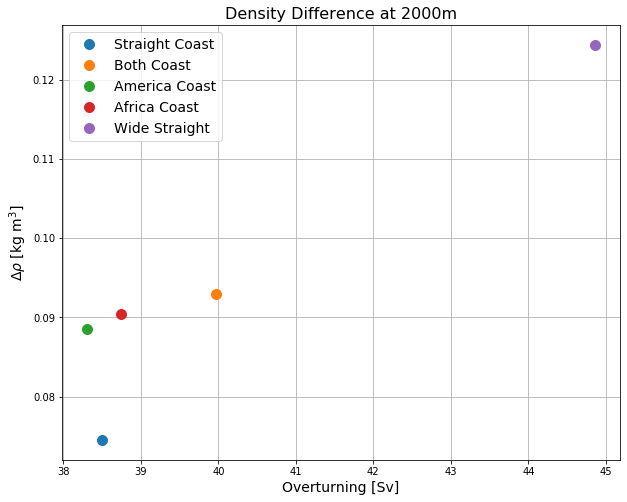

In [96]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, delta_rho_straight.sel(zl=2000, method='nearest'), 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, delta_rho_both.sel(zl=2000, method='nearest'), 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, delta_rho_am.sel(zl=2000, method='nearest'), 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, delta_rho_af.sel(zl=2000, method='nearest'), 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, delta_rho_wide.sel(zl=2000, method='nearest'), 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\Delta \rho$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Density Difference at 2000m', fontsize=16)
plt.show()

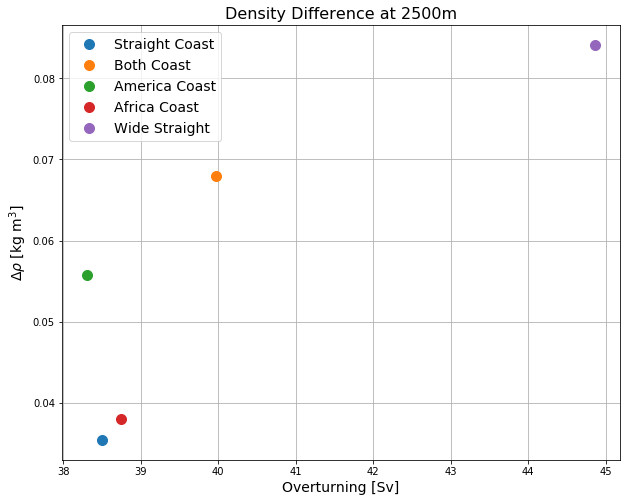

In [97]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, delta_rho_straight.sel(zl=2500, method='nearest'), 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, delta_rho_both.sel(zl=2500, method='nearest'), 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, delta_rho_am.sel(zl=2500, method='nearest'), 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, delta_rho_af.sel(zl=2500, method='nearest'), 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, delta_rho_wide.sel(zl=2500, method='nearest'), 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\Delta \rho$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Density Difference at 2500m', fontsize=16)
plt.show()

### Plotting against twice integrated meridional density gradient (northern boundary - 30S) from scale height to surface (currently using value of 2000 m as proxy) a la Butler et al 2016

In [99]:
# Straight Coast
rho_north_straight = calc_sigma2(dz_straight, 
                                 dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                 dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_straight = calc_sigma2(dz_straight, 
                                 dy_straight.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                                 dy_straight.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_straight_tmp = rho_north_straight.copy()
delta_rho_straight_tmp.values = rho_north_straight.values-rho_south_straight.values
delta_rho_straight = delta_rho_straight_tmp.mean(dim='yh').mean(dim='xh')


# Both Coast
rho_north_both = calc_sigma2(dz_both, 
                             dy_both.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                             dy_both.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_both = calc_sigma2(dz_both, 
                             dy_both.so.sel(xh=slice(240,243)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                             dy_both.thetao.sel(xh=slice(240,243)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_both_tmp = rho_north_both.copy()
delta_rho_both_tmp.values = rho_north_both.values-rho_south_both.values
delta_rho_both = delta_rho_both_tmp.mean(dim='yh').mean(dim='xh')


# Wide Coast
rho_north_wide = calc_sigma2(dz_wide, 
                            dy_wide.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                            dy_wide.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_wide = calc_sigma2(dz_wide, 
                            dy_wide.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                            dy_wide.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_wide_tmp = rho_north_wide.copy()
delta_rho_wide_tmp.values = rho_north_wide.values-rho_south_wide.values
delta_rho_wide = delta_rho_wide_tmp.mean(dim='yh').mean(dim='xh')


# America Coast
rho_north_am = calc_sigma2(dz_am, 
                            dy_am.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                            dy_am.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_am = calc_sigma2(dz_am, 
                            dy_am.so.sel(xh=slice(240,243)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                            dy_am.thetao.sel(xh=slice(240,243)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_am_tmp = rho_north_am.copy()
delta_rho_am_tmp.values = rho_north_am.values-rho_south_am.values
delta_rho_am = delta_rho_am_tmp.mean(dim='yh').mean(dim='xh')


# Africa Coast
rho_north_af = calc_sigma2(dz_af, 
                            dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'), 
                            dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(58,61)).isel(time=slice(-31,-1)).mean(dim='time'))

rho_south_af = calc_sigma2(dz_af, 
                            dy_af.so.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'), 
                            dy_af.thetao.sel(xh=slice(252,255)).sel(yh=slice(-32,-29)).isel(time=slice(-31,-1)).mean(dim='time'))

delta_rho_af_tmp = rho_north_af.copy()
delta_rho_af_tmp.values = rho_north_af.values-rho_south_af.values
delta_rho_af = delta_rho_af_tmp.mean(dim='yh').mean(dim='xh')



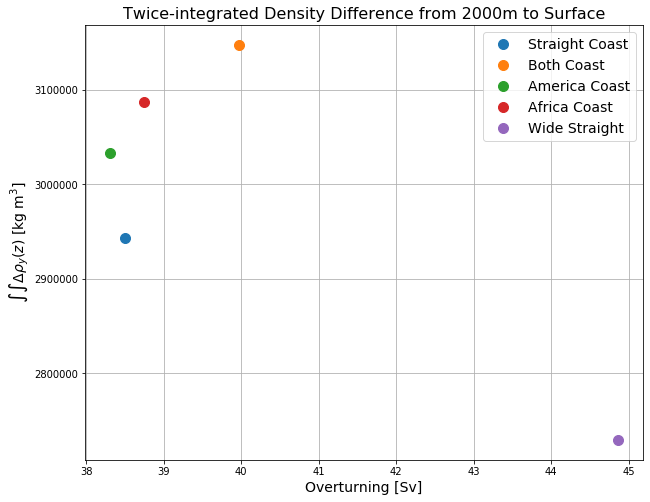

In [100]:
dz = xr.zeros_like(dy_straight.zl) + 2.5
dz[1:31] = dy_straight.zl.diff('zl').values

dint_drho_straight = ((delta_rho_straight.sel(zl=slice(0,2000))*dz.sel(zl=slice(0,2000))).sum(dim='zl')*dz.sel(zl=slice(0,2000))).sum(dim='zl')
dint_drho_both = ((delta_rho_both.sel(zl=slice(0,2000))*dz.sel(zl=slice(0,2000))).sum(dim='zl')*dz.sel(zl=slice(0,2000))).sum(dim='zl')
dint_drho_wide = ((delta_rho_wide.sel(zl=slice(0,2000))*dz.sel(zl=slice(0,2000))).sum(dim='zl')*dz.sel(zl=slice(0,2000))).sum(dim='zl')
dint_drho_am = ((delta_rho_am.sel(zl=slice(0,2000))*dz.sel(zl=slice(0,2000))).sum(dim='zl')*dz.sel(zl=slice(0,2000))).sum(dim='zl')
dint_drho_af = ((delta_rho_af.sel(zl=slice(0,2000))*dz.sel(zl=slice(0,2000))).sum(dim='zl')*dz.sel(zl=slice(0,2000))).sum(dim='zl')
                      
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, dint_drho_straight, 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, dint_drho_both, 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, dint_drho_am, 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, dint_drho_af, 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, dint_drho_wide, 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\int \int \Delta \rho_y (z)$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Twice-integrated Density Difference from 2000m to Surface', fontsize=16)
plt.show()

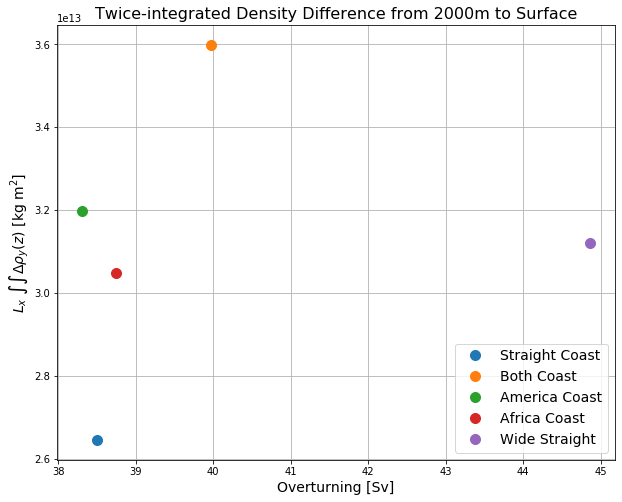

In [101]:
# Lx = average zonal width of basin. 
# Come back and do this more rigorously!

Lx_straight = 8991000 # m
Lx_both = 11433000    # m
Lx_am = 10545000      # m
Lx_af = 9879000       # m
Lx_wide = 11433000    # m

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, dint_drho_straight*Lx_straight, 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, dint_drho_both*Lx_both, 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, dint_drho_am*Lx_am, 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, dint_drho_af*Lx_af, 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, dint_drho_wide*Lx_wide, 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(loc='lower right', fontsize=14)
plt.ylabel(r'$L_x\ \int \int \Delta \rho_y (z)$ [kg m$^2$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Twice-integrated Density Difference from 2000m to Surface', fontsize=16)
plt.show()

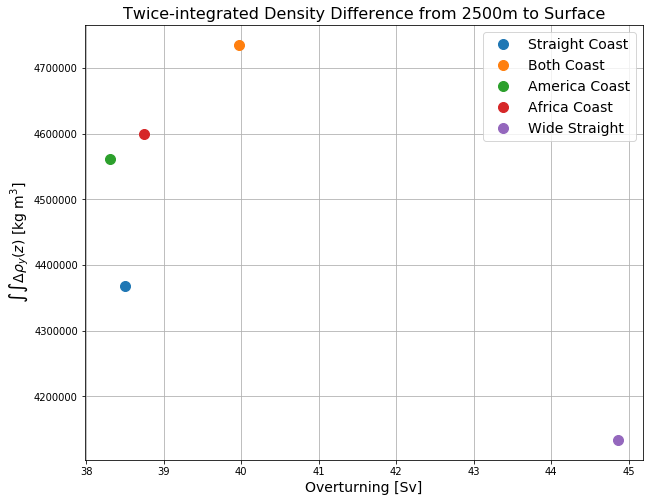

In [109]:
dz = xr.zeros_like(dy_straight.zl) + 2.5
dz[1:31] = dy_straight.zl.diff('zl').values

dint_drho_straight = ((delta_rho_straight.sel(zl=slice(0,2500))*dz.sel(zl=slice(0,2500))).sum(dim='zl')*dz.sel(zl=slice(0,2500))).sum(dim='zl')
dint_drho_both = ((delta_rho_both.sel(zl=slice(0,2500))*dz.sel(zl=slice(0,2500))).sum(dim='zl')*dz.sel(zl=slice(0,2500))).sum(dim='zl')
dint_drho_wide = ((delta_rho_wide.sel(zl=slice(0,2500))*dz.sel(zl=slice(0,2500))).sum(dim='zl')*dz.sel(zl=slice(0,2500))).sum(dim='zl')
dint_drho_am = ((delta_rho_am.sel(zl=slice(0,2500))*dz.sel(zl=slice(0,2500))).sum(dim='zl')*dz.sel(zl=slice(0,2500))).sum(dim='zl')
dint_drho_af = ((delta_rho_af.sel(zl=slice(0,2500))*dz.sel(zl=slice(0,2500))).sum(dim='zl')*dz.sel(zl=slice(0,2500))).sum(dim='zl')
                      
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, dint_drho_straight, 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, dint_drho_both, 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, dint_drho_am, 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, dint_drho_af, 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, dint_drho_wide, 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\int \int \Delta \rho_y (z)$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Twice-integrated Density Difference from 2500m to Surface', fontsize=16)
plt.show()

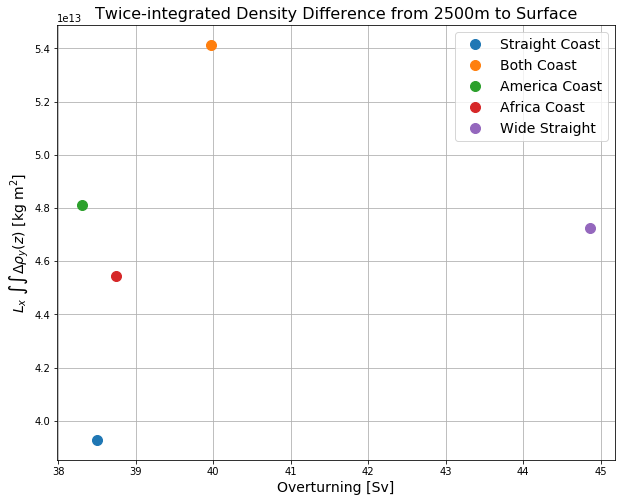

In [103]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, dint_drho_straight*Lx_straight, 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, dint_drho_both*Lx_both, 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, dint_drho_am*Lx_am, 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, dint_drho_af*Lx_af, 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, dint_drho_wide*Lx_wide, 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$L_x\ \int \int \Delta \rho_y (z)$ [kg m$^2$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Twice-integrated Density Difference from 2500m to Surface', fontsize=16)
plt.show()

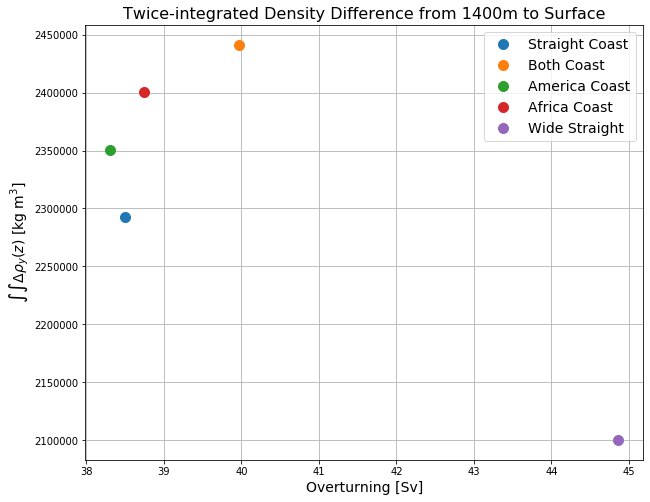

In [104]:
dint_drho_straight = ((delta_rho_straight.sel(zl=slice(0,1400))*dz.sel(zl=slice(0,1400))).sum(dim='zl')*dz.sel(zl=slice(0,1400))).sum(dim='zl')
dint_drho_both = ((delta_rho_both.sel(zl=slice(0,1400))*dz.sel(zl=slice(0,1400))).sum(dim='zl')*dz.sel(zl=slice(0,1400))).sum(dim='zl')
dint_drho_wide = ((delta_rho_wide.sel(zl=slice(0,1400))*dz.sel(zl=slice(0,1400))).sum(dim='zl')*dz.sel(zl=slice(0,1400))).sum(dim='zl')
dint_drho_am = ((delta_rho_am.sel(zl=slice(0,1400))*dz.sel(zl=slice(0,1400))).sum(dim='zl')*dz.sel(zl=slice(0,1400))).sum(dim='zl')
dint_drho_af = ((delta_rho_af.sel(zl=slice(0,1400))*dz.sel(zl=slice(0,1400))).sum(dim='zl')*dz.sel(zl=slice(0,1400))).sum(dim='zl')
                      
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, dint_drho_straight, 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, dint_drho_both, 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, dint_drho_am, 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, dint_drho_af, 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, dint_drho_wide, 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\int \int \Delta \rho_y (z)$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Twice-integrated Density Difference from 1400m to Surface', fontsize=16)
plt.show()

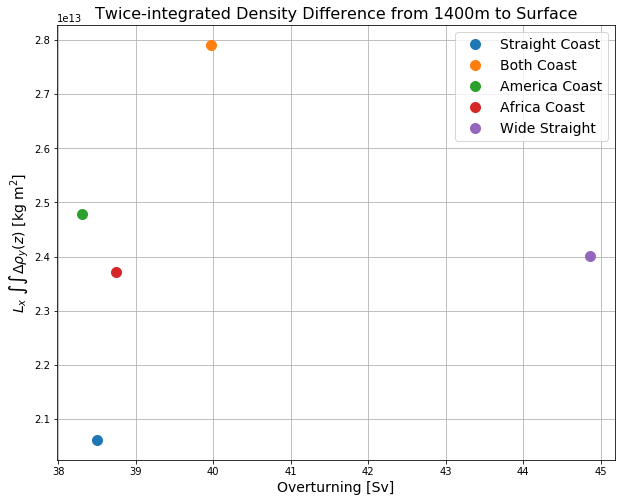

In [105]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, dint_drho_straight*Lx_straight, 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, dint_drho_both*Lx_both, 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, dint_drho_am*Lx_am, 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, dint_drho_af*Lx_af, 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, dint_drho_wide*Lx_wide, 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$L_x\ \int \int \Delta \rho_y (z)$ [kg m$^2$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Twice-integrated Density Difference from 1400m to Surface', fontsize=16)
plt.show()

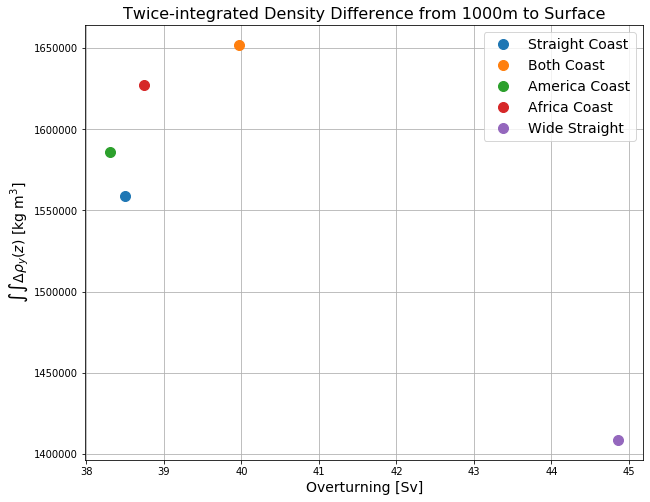

In [106]:
dint_drho_straight = ((delta_rho_straight.sel(zl=slice(0,1000))*dz.sel(zl=slice(0,1000))).sum(dim='zl')*dz.sel(zl=slice(0,1000))).sum(dim='zl')
dint_drho_both = ((delta_rho_both.sel(zl=slice(0,1000))*dz.sel(zl=slice(0,1000))).sum(dim='zl')*dz.sel(zl=slice(0,1000))).sum(dim='zl')
dint_drho_wide = ((delta_rho_wide.sel(zl=slice(0,1000))*dz.sel(zl=slice(0,1000))).sum(dim='zl')*dz.sel(zl=slice(0,1000))).sum(dim='zl')
dint_drho_am = ((delta_rho_am.sel(zl=slice(0,1000))*dz.sel(zl=slice(0,1000))).sum(dim='zl')*dz.sel(zl=slice(0,1000))).sum(dim='zl')
dint_drho_af = ((delta_rho_af.sel(zl=slice(0,1000))*dz.sel(zl=slice(0,1000))).sum(dim='zl')*dz.sel(zl=slice(0,1000))).sum(dim='zl')
                      
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, dint_drho_straight, 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, dint_drho_both, 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, dint_drho_am, 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, dint_drho_af, 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, dint_drho_wide, 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$\int \int \Delta \rho_y (z)$ [kg m$^3$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Twice-integrated Density Difference from 1000m to Surface', fontsize=16)
plt.show()

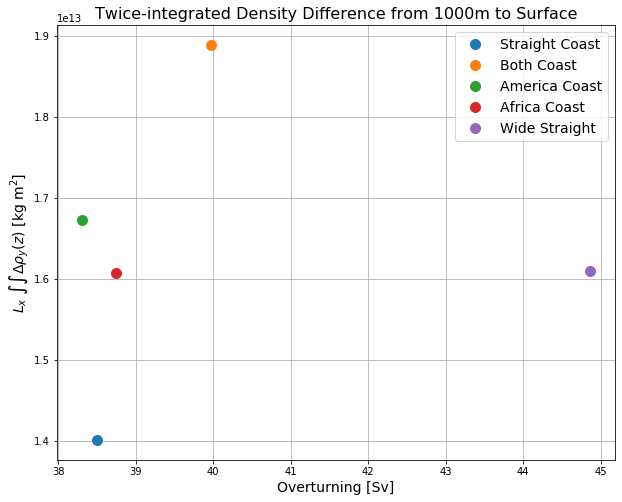

In [107]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(max_ov_straight, dint_drho_straight*Lx_straight, 'o', markersize=10, label=case_straight)
ax.plot(max_ov_both, dint_drho_both*Lx_both, 'o', markersize=10, label=case_both)
ax.plot(max_ov_am, dint_drho_am*Lx_am, 'o', markersize=10, label=case_am)
ax.plot(max_ov_af, dint_drho_af*Lx_af, 'o', markersize=10, label=case_af)
ax.plot(max_ov_wide, dint_drho_wide*Lx_wide, 'o', markersize=10, label=case_wide)
plt.grid()
plt.legend(fontsize=14)
plt.ylabel(r'$L_x\ \int \int \Delta \rho_y (z)$ [kg m$^2$]', fontsize=14), plt.xlabel('Overturning [Sv]', fontsize=14)
plt.title('Twice-integrated Density Difference from 1000m to Surface', fontsize=16)
plt.show()

In [108]:
# Try to plot predicted overturning strength vs actual overturning strength
# dy_straight.vo.sel(xh=slice(252,255)).sel(yq=slice(66,69)).isel(time=slice(-31,-1)).mean(dim='time')

### Below is all still work in progress to solve for scale height:

In [36]:
dz = xr.zeros_like(dy_straight.zl) + 2.5
dz[1:31] = dy_straight.zl.diff('zl').values

inside = delta_rho_straight*dz

In [37]:
rhs = xr.zeros_like(dy_straight.zl)
lhs = xr.zeros_like(dy_straight.zl)

for i in range(0,len(rhs)):
#     rhs[i] = 1/dy_straight.zl.isel(zl=-1)*(inside.isel(zl=slice(0,i))).sum(dim='zl')*dz.isel(zl=slice(0,i)).sum(dim='zl')
    rhs[i] = 1/dy_straight.zl.isel(zl=-1)*(inside.isel(zl=slice(0,i))).sum(dim='zl')*dz.sum(dim='zl')
    lhs[i] = (inside.isel(zl=slice(0,i))).sum(dim='zl')


# for i in range(0,len(rhs)):
#     rhs[i] = 1/dy_straight.zl.isel(zl=-1)*(inside.isel(zl=slice(0,i))).sum(dim='zl')*dz.isel(zl=slice(0,i)).sum(dim='zl')


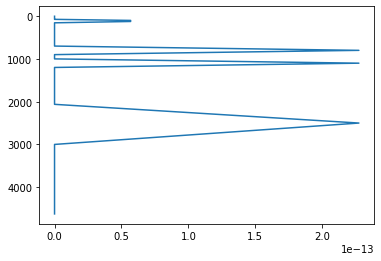

In [38]:
plt.plot(lhs-rhs, dy_straight.zl)
plt.gca().invert_yaxis()
# rhs

In [39]:
## Ok this is wrong

def scale_depth(dataset, delta_rho):
    dz = xr.zeros_like(dataset.zl) + 2.5
    dz[1:31] = dataset.zl.diff('zl').values

    inside = delta_rho*dz

    rhs = xr.zeros_like(dataset.zl)
    lhs = xr.zeros_like(dataset.zl)

    for i in range(0,len(rhs)):
        rhs[i] = 1/dataset.zl.isel(zl=-1)*(inside.isel(zl=slice(0,i))).sum(dim='zl')*dz.sum(dim='zl')
        lhs[i] = (inside.isel(zl=slice(0,i))).sum(dim='zl')

    diff = lhs-rhs
    
    return diff, lhs, rhs

In [40]:
# another attempt, also  wrong

def scale_depth(dataset, delta_rho):
    dz = xr.zeros_like(dataset.zl) + 2.5
    dz[1:31] = dataset.zl.diff('zl').values

    inside = delta_rho*dz

    rhs = xr.zeros_like(dataset.zl)
    lhs = xr.zeros_like(dataset.zl)

    for i in range(0,len(rhs)):
        lhs[i] = (inside.isel(zl=slice(0,i))).sum(dim='zl')
      
    # 0 should be z, need another loop
    for i in range(0,len(rhs)):
        rhs[i] = 1/dataset.zl.isel(zl=-1)*(inside.isel(zl=slice(0,i))).sum(dim='zl')*dz.sum(dim='zl')

    diff = lhs-rhs
    
    return diff, lhs, rhs

In [41]:
# wrong, just keeping for posterity 

diff_straight, lhs_straight, rhs_straight = scale_depth(dy_straight, delta_rho_straight)
diff_both, lhs_both, rhs_both = scale_depth(dy_both, delta_rho_both)
diff_wide, lhs_wide, rhs_wide = scale_depth(dy_wide, delta_rho_wide)
diff_am, lhs_am, rhs_am = scale_depth(dy_am, delta_rho_am)
diff_af, lsh_af, rhs_af = scale_depth(dy_af, delta_rho_af)


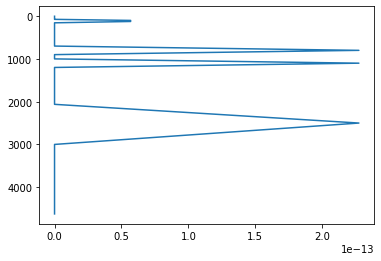

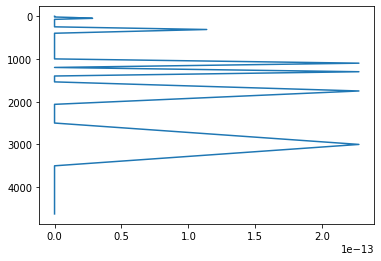

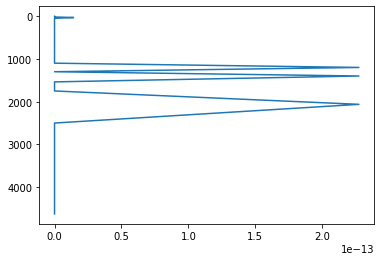

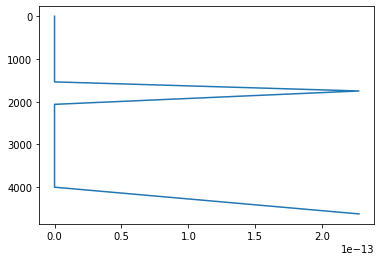

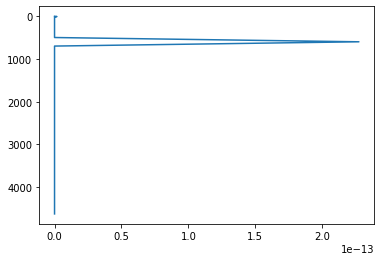

In [42]:
# wrong, just keeping for posterity 

plt.plot(diff_straight, dy_straight.zl)
plt.gca().invert_yaxis()
plt.show()
plt.plot(diff_both, dy_both.zl)
plt.gca().invert_yaxis()
plt.show()
plt.plot(diff_wide, dy_wide.zl)
plt.gca().invert_yaxis()
plt.show()
plt.plot(diff_am, dy_am.zl)
plt.gca().invert_yaxis()
plt.show()
plt.plot(diff_af, dy_af.zl)
plt.gca().invert_yaxis()
plt.show()

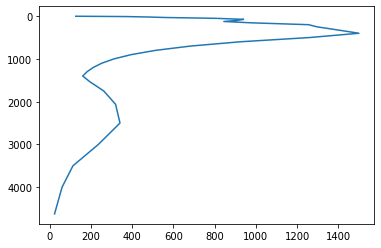

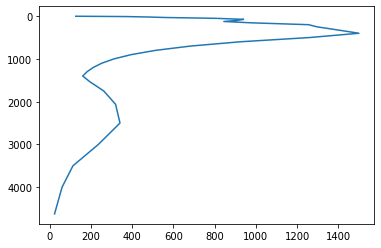

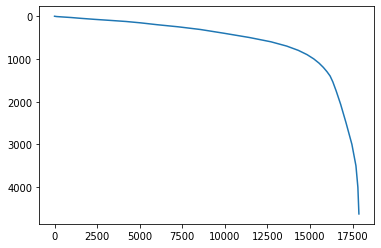

<xarray.DataArray 'thetao' (zl: 31)>
array([3.95074360e-03, 1.23661042e-02, 2.31218669e-02, 4.82265847e-02,
       7.95219297e-02, 1.04397290e-01, 1.26016310e-01, 1.45478901e-01,
       1.63801600e-01, 1.85232264e-01, 2.15798351e-01, 2.58368932e-01,
       3.18277416e-01, 4.03222696e-01, 5.24007755e-01, 6.96035156e-01,
       9.41164018e-01, 1.28583879e+00, 1.74620759e+00, 2.25346106e+00,
       2.64141304e+00, 2.92452670e+00, 3.18816114e+00, 3.44341672e+00,
       3.70720068e+00, 4.03398899e+00, 4.37633355e+00, 4.61770657e+00,
       4.83986563e+00, 5.05220191e+00, 5.18709783e+00])
Coordinates:
  * zl       (zl) float64 4.625e+03 4e+03 3.5e+03 3e+03 ... 32.5 20.0 10.0 2.5

In [44]:
# another another attempt a la de Boer et al 2010
# first, find H -- depth at which pressure gradient is 0
# delta p(H) = 0 = delta p_0 - int_H^0 delta rho*g*dz
# then, solve
g = 9.81

plt.plot(delta_rho_straight*g*dz, delta_rho_straight.zl)
plt.gca().invert_yaxis()
plt.show()


test = delta_rho_straight.transpose('zl', transpose_coords=True)

plt.plot(test*g*dz, test.zl)
plt.gca().invert_yaxis()
plt.show()

dens_int_straight = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (delta_rho_straight*g*dz).isel(zl=slice(0,i)).sum(dim='zl')
    dens_int_straight[i] = integ.values
    
plt.plot(dens_int_straight, dens_int_straight.zl)
plt.gca().invert_yaxis()
plt.show()

delta_rho_straight[::-1]

In [45]:
delta_rho_straight = delta_rho_straight[::-1]
delta_rho_both = delta_rho_both[::-1]

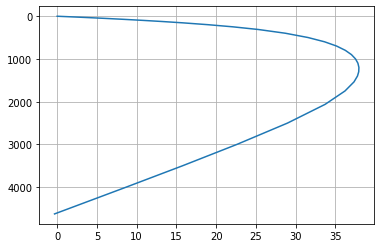

<xarray.DataArray 'thetao' ()>
array(37.9705831)


In [54]:
# another attempt a la Butler et al 2016

c_rho = 0.96
g = 9.81
rho_0 = 1035
f_0 = 1e-4
# Ly = (60)*111000 # uncomment if doing density diff from north to eq
Ly = (60+31)*111000 # uncomment if doing density diff from north to southern extent of Africa

constant = c_rho*g/(rho_0*f_0*Ly)

h = delta_rho_straight.zl.isel(zl=0)

# plt.plot(delta_rho_straight, delta_rho_straight.zl)
# plt.gca().invert_yaxis()
# plt.show()

# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

term1_tmp = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (delta_rho_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1 = 1/h * (term1_tmp*dz).sum(dim='zl')

# term2 = integral from z to 0 of delta rho

term2 = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (delta_rho_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    term2[i] = integ.values

# plt.plot(term2, delta_rho_straight.zl),plt.gca().invert_yaxis()
# plt.show()

# V(z) = constant * (term1 - term2)
Vz_straight = constant * (term1 - term2)

# plt.plot(Vz_straight, delta_rho_straight.zl),plt.gca().invert_yaxis()
# plt.show()

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_straight_tmp = xr.zeros_like(delta_rho_straight)

for i in range(len(delta_rho_straight.zl)):
    integ = (Vz_straight*dz).isel(zl=slice(i,-1)).sum(dim='zl')
    Psi_straight_tmp[i] = integ.values

Psi_straight = (Psi_straight_tmp*Lx_straight)/(1e6)

plt.plot(Psi_straight, Psi_straight.zl)
plt.gca().invert_yaxis()
plt.grid()
plt.show()

print(Psi_straight.max())

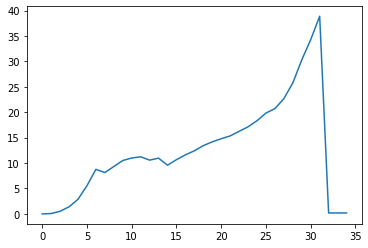

38.87737 Sv
<xarray.DataArray 'h' ()>
array(3039.0662, dtype=float32)
Coordinates:
    yh       float64 60.0
    rho2_l   float64 1.037e+03


<xarray.DataArray 'rho2_l' (rho2_l: 35)>
array([1013.75    , 1028.5     , 1029.242188, 1029.71875 , 1030.179688,
       1030.625   , 1031.054688, 1031.46875 , 1031.867188, 1032.25    ,
       1032.617188, 1032.96875 , 1033.304688, 1033.625   , 1033.929688,
       1034.21875 , 1034.492188, 1034.75    , 1034.992188, 1035.21875 ,
       1035.429688, 1035.625   , 1035.804688, 1035.96875 , 1036.117188,
       1036.25    , 1036.375   , 1036.5     , 1036.625   , 1036.75    ,
       1036.875   , 1037.      , 1037.125   , 1037.25    , 1037.65625 ])
Coordinates:
  * rho2_l   (rho2_l) float64 1.014e+03 1.028e+03 ... 1.037e+03 1.038e+03
Attributes:
    long_name:       Target Potential Density at cell center
    units:           kg m-3
    cartesian_axis:  Z
    positive:        down

In [63]:
# maximum magnitude of the overturning streamfunction — between the equator and 30°N at each depth level

psi_max_straight = []

sfn_straight = sfn_small_resmean_straight[:,18:49]
# sfn_straight = sfn_small_resmean_straight

# for i in range(len(sfn_straight[:,1])):
#     tmp = sfn_straight[i,:].max()
#     psi_max_straight.append(tmp)

psi_max_straight = np.amax(sfn_straight, axis=1)

plt.plot(psi_max_straight)
plt.show()
# plt.plot(np.nanmean(sfn_small_resmean_straight[:,18:49], axis=1))
# plt.show()

## The reason these look like this is because the overturning was calculated on density surfaces, 
# not on depth surfaces. Most of the overturning occurs in denser water. Need to do this calculation on
# overturning calculated on depth surfaces. 

print(psi_max_straight.max(), 'Sv')
print(max_depth_straight)

drho_straight.rho2_l 

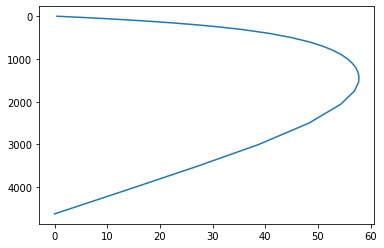

In [48]:
# term1 = 1/h * integral from -h to 0 of integral from z to 0 of delta rho

term1_tmp = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (delta_rho_both*dz).isel(zl=slice(0,i)).sum(dim='zl')
    term1_tmp[i] = integ.values
    
term1 = 1/h * (term1_tmp*dz).sum(dim='zl')
term1

# term2 = integral from z to 0 of delta rho

term2 = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (delta_rho_both*dz).isel(zl=slice(0,i)).sum(dim='zl')
    term2[i] = integ.values

# V(z) = constant * (term1 - term2)
Vz_both = constant * (term1 - term2)

# Psi_p = Lx * integral from z to 0 of Vz 
Psi_both_tmp = xr.zeros_like(delta_rho_both)

for i in range(len(delta_rho_both.zl)):
    integ = (Vz_both*dz).isel(zl=slice(0,i)).sum(dim='zl')
    Psi_both_tmp[i] = integ.values

Psi_both = (Psi_both_tmp*Lx_both)/(1e6)

plt.plot(Psi_both, Psi_both.zl)
plt.gca().invert_yaxis()
plt.show()

In [49]:
print(1/dy_straight.zl.isel(zl=-1) * ((delta_rho_straight*dz).sum(dim='zl')*dz).sum(dim='zl'))

# .sel(zl=slice(0,2000)
1/dy_straight.zl.isel(zl=-1)*((delta_rho_straight.sel(zl=slice(0,2000))*dz.sel(zl=slice(0,2000))).sum(dim='zl')*dz).sum(dim='zl')


<xarray.DataArray ()>
array(1824.58938842)
Coordinates:
    zl       float64 4.625e+03


<xarray.DataArray ()>
array(0.)
Coordinates:
    zl       float64 4.625e+03

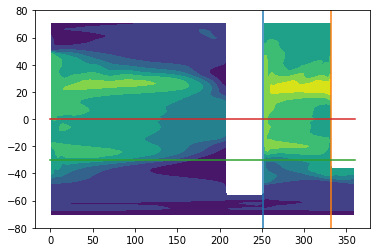

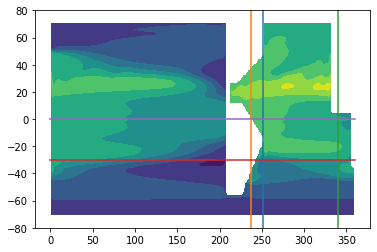

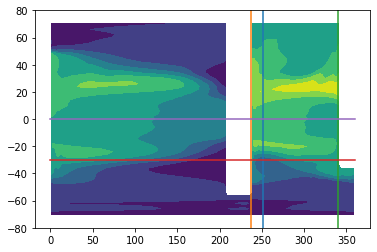

In [50]:
fig, ax = plt.subplots()
ax.contourf(dy_straight.xh, dy_straight.yh, dy_straight.sos.isel(time=slice(-31,-1)).mean(dim='time'))
ax.plot([251,251], [-80,80])
ax.plot([332,332], [-80,80])
ax.plot([0,360], [-30,-30])
ax.plot([0,360], [0,0])
plt.show()

fig, ax = plt.subplots()
ax.contourf(dy_both.xh, dy_both.yh, dy_both.sos.isel(time=slice(-31,-1)).mean(dim='time'))
ax.plot([251,251], [-80,80])
ax.plot([237,237], [-80,80])
ax.plot([340,340], [-80,80])
ax.plot([0,360], [-30,-30])
ax.plot([0,360], [0,0])
plt.show()

fig, ax = plt.subplots()
ax.contourf(dy_wide.xh, dy_wide.yh, dy_wide.sos.isel(time=slice(-31,-1)).mean(dim='time'))
ax.plot([251,251], [-80,80])
ax.plot([237,237], [-80,80])
ax.plot([340,340], [-80,80])
ax.plot([0,360], [-30,-30])
ax.plot([0,360], [0,0])
plt.show()